In [56]:
import numpy as np
import pandas as pd
import string

In [57]:
import chardet

with open(r"C:\Users\ronit\OneDrive\Desktop\College\Sem 7\SNLP\spam.csv", 'rb') as f:
    result = chardet.detect(f.read())

print(result)

{'encoding': 'Windows-1252', 'confidence': 0.7269493857068697, 'language': ''}


In [58]:
encoding = result['encoding']
df = pd.read_csv(r"C:\Users\ronit\OneDrive\Desktop\College\Sem 7\SNLP\spam.csv", encoding=encoding)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [59]:
df.dropna(inplace=True, axis=1)
df.columns=['class','message']
df

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [60]:
df.describe()

,class,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [61]:
df.groupby('class').describe()

message                                                               
        count unique                                                top freq
class                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [62]:
df['label'] = df['class'].map({'ham': 0, 'spam': 1})
df

,class,message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [63]:
df['message_len']=df.message.apply(len)
df.head()

,class,message,label,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [64]:
df['message_len'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: message_len, dtype: float64

In [65]:
#Removing stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
def stopwords_removal(text):
    words=word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)


df['stopwords_removed']=df['message'].apply(stopwords_removal)
df.head(5)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ronit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,class,message,label,message_len,stopwords_removed
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,"Go jurong point , crazy .. Available bugis n g..."
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar ... Joking wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,49,U dun say early hor ... U c already say ...
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,"Nah n't think goes usf , lives around though"


In [66]:
def remove_punctuation(text):
    translator=str.maketrans('', '', string.punctuation)
    return text.translate(translator).split()

df['punctuation_removed']=df['stopwords_removed'].apply(remove_punctuation)
df.head()

,class,message,label,message_len,stopwords_removed,punctuation_removed
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,"Go jurong point , crazy .. Available bugis n g...","[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar ... Joking wif u oni ...,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry 2 wkly comp win FA Cup final tkts 2...,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,0,49,U dun say early hor ... U c already say ...,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,"Nah n't think goes usf , lives around though","[Nah, nt, think, goes, usf, lives, around, tho..."


In [68]:
#Top 10 most frequent words from each class
from collections import Counter
def most_frequent_words(messages, n=10):
    all_words = [word for message in messages for word in message]
    counter = Counter(all_words)
    return counter.most_common(n)

ham_messages = df[df['label'] == 0]['punctuation_removed']
spam_messages = df[df['label'] == 1]['punctuation_removed']
top_ham_words=most_frequent_words(ham_messages)
top_spam_words=most_frequent_words(spam_messages)
print("Spam words:", top_spam_words)
print("Ham words:", top_ham_words)

Spam words: [('call', 188), ('2', 176), ('Call', 138), ('4', 123), ('FREE', 115), ('ur', 107), ('U', 97), ('mobile', 95), ('claim', 78), ('Txt', 75)]
Ham words: [('u', 735), ('s', 423), ('m', 387), ('nt', 355), ('gt', 318), ('lt', 316), ('2', 309), ('get', 290), ('U', 269), ('go', 232)]


In [69]:
#Top 10 most frequent bigrams from each class
from nltk import bigrams
def get_top_bigrams(messages, n=10):
    all_bigrams = [bigram for message in messages for bigram in bigrams(message)]
    counter = Counter(all_bigrams)
    return counter.most_common(n)

top_ham_bigrams = get_top_bigrams(ham_messages)
top_spam_bigrams = get_top_bigrams(spam_messages)
print("Top 10 bi-grams in ham messages:", top_ham_bigrams)
print("Top 10 bi-grams in spam messages:", top_spam_bigrams)

Top 10 bi-grams in ham messages: [(('lt', 'gt'), 276), (('gon', 'na'), 57), (('ca', 'nt'), 52), (('call', 'later'), 50), (('ll', 'call'), 44), (('Sorry', 'll'), 39), (('wan', '2'), 31), (('let', 'know'), 29), (('r', 'u'), 25), (('lt', 'DECIMAL'), 23)]
Top 10 bi-grams in spam messages: [(('Please', 'call'), 26), (('prize', 'GUARANTEED'), 21), (('GUARANTEED', 'Call'), 21), (('å£1000', 'cash'), 19), (('await', 'collection'), 19), (('land', 'line'), 18), (('every', 'week'), 18), (('C', 's'), 17), (('2', 'claim'), 17), (('contact', 'U'), 17)]


In [70]:
#Top 10 most frequent trigrams from each class
from nltk import trigrams
def get_top_trigrams(messages, n=10):
    all_trigrams = [trigram for message in messages for trigram in trigrams(message)]
    counter = Counter(all_trigrams)
    return counter.most_common(n)

top_ham_trigrams = get_top_trigrams(ham_messages)
top_spam_trigrams = get_top_trigrams(spam_messages)
print("Top 10 tri-grams in ham messages:", top_ham_trigrams)
print("Top 10 tri-grams in spam messages:", top_spam_trigrams)


Top 10 tri-grams in ham messages: [(('ll', 'call', 'later'), 41), (('Sorry', 'll', 'call'), 38), (('lt', 'DECIMAL', 'gt'), 23), (('m', 'gon', 'na'), 17), (('like', 'lt', 'gt'), 13), (('u', 'wan', '2'), 13), (('cant', 'pick', 'phone'), 12), (('pick', 'phone', 'right'), 12), (('phone', 'right', 'Pls'), 12), (('right', 'Pls', 'send'), 12)]
Top 10 tri-grams in spam messages: [(('prize', 'GUARANTEED', 'Call'), 20), (('land', 'line', 'Claim'), 13), (('PRIVATE', '2003', 'Account'), 13), (('2003', 'Account', 'Statement'), 13), (('shows', '800', 'unredeemed'), 12), (('URGENT', 'trying', 'contact'), 11), (('every', 'week', 'txt'), 11), (('call', 'customer', 'service'), 10), (('customer', 'service', 'representative'), 10), (('guaranteed', 'å£1000', 'cash'), 10)]


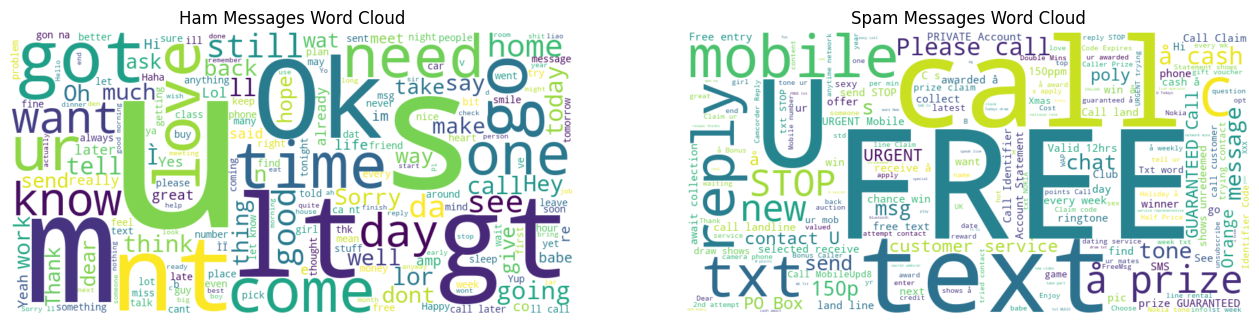

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ham_text = ' '.join([' '.join(message) for message in ham_messages])
spam_text = ' '.join([' '.join(message) for message in spam_messages])
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title("Ham Messages Word Cloud")
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Spam Messages Word Cloud")
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [84]:
#CountVEctorizer/BagOfWords
from sklearn.feature_extraction.text import CountVectorizer
df['final_message'] = df['punctuation_removed'].apply(' '.join)
vectorizer = CountVectorizer()
X1 = vectorizer.fit_transform(df['final_message'])
X1_df = pd.DataFrame(X1.toarray(), columns=vectorizer.get_feature_names_out())
print(X1_df.head(5))

   008704050406  0089  0121  01223585236  01223585334  0125698789  02  020603  \
0             0     0     0            0            0           0   0       0   
1             0     0     0            0            0           0   0       0   
2             0     0     0            0            0           0   0       0   
3             0     0     0            0            0           0   0       0   
4             0     0     0            0            0           0   0       0   

   0207  02070836089  ...  ìï  ûthanks  ûªm  ûªt  ûªve  ûï  ûïharry  ûò  \
0     0            0  ...   0        0    0    0     0   0        0   0   
1     0            0  ...   0        0    0    0     0   0        0   0   
2     0            0  ...   0        0    0    0     0   0        0   0   
3     0            0  ...   0        0    0    0     0   0        0   0   
4     0            0  ...   0        0    0    0     0   0        0   0   

   ûówell  žö  
0       0   0  
1       0   0  
2       0   0 

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, df['label'], test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1-score with CountVectorizer: {f1:.4f}")


F1-score with CountVectorizer: 0.8930


In [86]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X2 = vectorizer.fit_transform(df['final_message'])
X2_df = pd.DataFrame(X2.toarray(), columns=vectorizer.get_feature_names_out())
print(X2_df.head(5))

   008704050406  0089  0121  01223585236  01223585334  0125698789   02  \
0           0.0   0.0   0.0          0.0          0.0         0.0  0.0   
1           0.0   0.0   0.0          0.0          0.0         0.0  0.0   
2           0.0   0.0   0.0          0.0          0.0         0.0  0.0   
3           0.0   0.0   0.0          0.0          0.0         0.0  0.0   
4           0.0   0.0   0.0          0.0          0.0         0.0  0.0   

   020603  0207  02070836089  ...   ìï  ûthanks  ûªm  ûªt  ûªve   ûï  ûïharry  \
0     0.0   0.0          0.0  ...  0.0      0.0  0.0  0.0   0.0  0.0      0.0   
1     0.0   0.0          0.0  ...  0.0      0.0  0.0  0.0   0.0  0.0      0.0   
2     0.0   0.0          0.0  ...  0.0      0.0  0.0  0.0   0.0  0.0      0.0   
3     0.0   0.0          0.0  ...  0.0      0.0  0.0  0.0   0.0  0.0      0.0   
4     0.0   0.0          0.0  ...  0.0      0.0  0.0  0.0   0.0  0.0      0.0   

    ûò  ûówell   žö  
0  0.0     0.0  0.0  
1  0.0     0.0  0.0  
2 

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X2, df['label'], test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1-score with TF-IDF: {f1:.4f}")

F1-score with TF-IDF: 0.8930


In [91]:
#Text Preprocessing
df = df.drop(columns=['stopwords_removed', 'punctuation_removed'])
df['tokenized_message'] = df['final_message'].apply(word_tokenize)
df['tokenized_message'] = df['tokenized_message'].apply(lambda tokens: [token.lower() for token in tokens])
df['tokenized_message'] = df['tokenized_message'].apply(lambda tokens: [token for token in tokens if token not in stopwords])

In [92]:
df.head(5)

,class,message,label,message_len,final_message,tokenized_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry 2 wkly comp win FA Cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,0,49,U dun say early hor U c already say,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah nt think goes usf lives around though,"[nah, nt, think, goes, usf, lives, around, tho..."


In [94]:
import re
def clean_text(tokens):
    cleaned_tokens = []
    for token in tokens:
        # Remove email addresses
        token = re.sub(r'\S+@\S+\.\S+', '', token)
        # Remove URLs
        token = re.sub(r'http\S+|www\S+|https\S+', '', token)
        # Remove HTML tags
        token = re.sub(r'<.*?>', '', token)
        if token:  # Only append non-empty tokens
            cleaned_tokens.append(token)
    return cleaned_tokens

df['cleaned_message'] = df['tokenized_message'].apply(clean_text)
df.head(5)

,class,message,label,message_len,final_message,tokenized_message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry 2 wkly comp win FA Cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,0,49,U dun say early hor U c already say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah nt think goes usf lives around though,"[nah, nt, think, goes, usf, lives, around, tho...","[nah, nt, think, goes, usf, lives, around, tho..."


In [ ]:
df = df.drop(columns=['tokenized_message', 'message_len'])
df['cleaned_message'] = df['cleaned_message'].apply(lambda tokens: [token for token in tokens if not token.isdigit()])
df['cleaned_message']=df['cleaned_message'].apply(remove_punctuation)
df.head()
#Error in this line, solve